Problem 1: 

- Read the database in from this heart1.csv file and analyze the data.
- Your analysis should include a statistical study of each variable: correlation of each variable, dependent  or independent, with all the other variables. Determine which variables are most highly correlated with each other and also which are highly correlated with the variable you wish to predict. 
- Create a cross covariance matrix to show which variables are not independent of each other and which ones are best predictors of heart disease. Create a pair plot.
- Based on this analysis you must determine what you think you will be able to do and which variables you think are most likely to play a significant roll in predicting the dependent variable, in this case occurrence of heart disease. 

- Your management at AMAPE want to be kept constantly updated on your progress. Write one paragraph based on these results indicating what you have learned from this analysis. We are looking for specific observations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
heart_df = pd.read_csv('./heart1.csv')
heart_df.head()

,age,sex,cpt,rbp,sc,fbs,rer,mhr,eia,opst,dests,nmvcf,thal,a1p2
0,29,1,2,130,204,0,2,202,0,0.0,1,0,3,1
1,34,0,2,118,210,0,0,192,0,0.7,1,0,3,1
2,34,1,1,118,182,0,2,174,0,0.0,1,0,3,1
3,35,1,4,120,198,0,0,130,1,1.6,2,0,7,2
4,35,1,4,126,282,0,2,156,1,0.0,1,0,7,2


## CORRELATION ANALYSIS

In [4]:
# Get the absolute correlation values for the dataset
heart_corr = heart_df.corr().abs()
heart_corr

,age,sex,cpt,rbp,sc,fbs,rer,mhr,eia,opst,dests,nmvcf,thal,a1p2
age,1.000000,0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,0.094401,1.000000,0.034636,0.062693,0.201647,0.042140,0.039253,0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
cpt,0.096920,0.034636,1.000000,0.043196,0.090465,0.098537,0.074325,0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
rbp,0.273053,0.062693,0.043196,1.000000,0.173019,0.155681,0.116157,0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
sc,0.220056,0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,0.018739,0.078243,0.027709,0.005755,0.126541,0.028836,0.118021
fbs,0.123458,0.042140,0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,0.004107,0.025538,0.044076,0.123774,0.049237,0.016319
rer,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
mhr,0.402215,0.076101,0.317682,0.039136,0.018739,0.022494,0.074628,1.000000,0.380719,0.349045,0.386847,0.265333,0.253397,0.418514
eia,0.098297,0.180022,0.353160,0.082793,0.078243,0.004107,0.095098,0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
opst,0.194234,0.097412,0.167244,0.222800,0.027709,0.025538,0.120034,0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [5]:
tri_corr = heart_corr * np.tri(*heart_corr.values.shape, k=-1).T
correlation_array = tri_corr.unstack() # Unstack the correlation results into a Pandas series
correlation_array.sort_values(inplace=True, ascending=False)
correlation_array.head(10)

dests  opst     0.609712
a1p2   thal     0.525020
       nmvcf    0.455336
       eia      0.419303
       mhr      0.418514
       opst     0.417967
       cpt      0.417436
mhr    age      0.402215
thal   sex      0.391046
dests  mhr      0.386847
dtype: float64

In [6]:
# This returns a pandas dataframe that shows the covariance
# and correlation of the labels with each other 
def get_relation_with_heart_disease(corr_array: pd.Series, cov_corr: int, is_target: bool):
    label_1 = pd.DataFrame([x[0] for x in corr_array.axes[0]])
    label_2 = pd.DataFrame([x[1] for x in corr_array.axes[0]])
    values = pd.Series(corr_array.values)
    
    relation_data = pd.concat([label_1, label_2, values], axis=1)
    relation_data.columns = ["label1", "label2", "Correlation" if cov_corr == 2 else "Covariance"]
    
    heart_data = relation_data[relation_data["label1"] == "a1p2"] if is_target else relation_data
    heart_data.reset_index(inplace=True, drop=True)
    return heart_data

## Correlation with all features other than the target feature a1p2

In [33]:
# Get the top 10 correlation data points
cor_with_features = get_relation_with_heart_disease(correlation_array, 2, False)
cor_with_features[:10]

,label1,label2,Correlation
0,dests,opst,0.609712
1,a1p2,thal,0.525020
2,a1p2,nmvcf,0.455336
3,a1p2,eia,0.419303
4,a1p2,mhr,0.418514
5,a1p2,opst,0.417967
6,a1p2,cpt,0.417436
7,mhr,age,0.402215
8,thal,sex,0.391046
9,dests,mhr,0.386847


## Correlation with target feature

In [34]:
# Get correlation with the target feature of a1p2
cor_with_disease = get_relation_with_heart_disease(correlation_array, 2, True)
cor_with_disease[:10]

,label1,label2,Correlation
0,a1p2,thal,0.525020
1,a1p2,nmvcf,0.455336
2,a1p2,eia,0.419303
3,a1p2,mhr,0.418514
4,a1p2,opst,0.417967
5,a1p2,cpt,0.417436
6,a1p2,dests,0.337616
7,a1p2,sex,0.297721
8,a1p2,age,0.212322
9,a1p2,rer,0.182091


## COVARIANCE ANALYSIS

In [9]:
# Covariance calculation
heart_cov = heart_df.cov().abs()
heart_cov.head()

,age,sex,cpt,rbp,sc,fbs,rer,mhr,eia,opst,dests,nmvcf,thal,a1p2
age,82.975093,0.402602,0.838786,44.426394,103.605452,0.400248,1.165056,84.874721,0.421685,2.026208,0.894176,3.061586,1.875589,0.962825
sex,0.402602,0.219207,0.015407,0.524287,4.879719,0.007022,0.018340,0.825403,0.039694,0.052230,0.014539,0.038373,0.355308,0.069393
cpt,0.838786,0.015407,0.902671,0.733044,4.442434,0.033320,0.070467,6.992028,0.158020,0.181970,0.079912,0.202575,0.484290,0.197439
rbp,44.426394,0.524287,0.733044,319.037051,159.731185,0.989674,2.070384,16.193432,0.696448,4.557435,1.563486,1.444816,4.577117,1.381660
sc,103.605452,4.879719,4.442434,159.731185,2671.467107,0.463307,8.647005,22.437340,1.904557,1.640149,0.182762,6.173510,2.892414,3.036762


In [35]:
tri_cov_df = heart_cov * np.tri(*heart_cov.values.shape, k=-1).T
cov_unstack = tri_cov_df.unstack() # Unstack the covariance results into a Pandas series
cov_unstack.sort_values(inplace=True, ascending=False)
cov_unstack.head(10)

sc    rbp    159.731185
      age    103.605452
mhr   age     84.874721
rbp   age     44.426394
mhr   sc      22.437340
      rbp     16.193432
thal  mhr     11.391904
opst  mhr      9.260037
rer   sc       8.647005
mhr   cpt      6.992028
dtype: float64

In [11]:
# Get the covariance of the top 10 related to the target feature
cov_with_disease = get_relation_with_heart_disease(cov_unstack, 1, True)
cov_with_disease[:10]

,label1,label2,Covariance
0,a1p2,mhr,4.826518
1,a1p2,sc,3.036762
2,a1p2,rbp,1.381660
3,a1p2,age,0.962825
4,a1p2,thal,0.507228
5,a1p2,opst,0.238290
6,a1p2,nmvcf,0.213961
7,a1p2,cpt,0.197439
8,a1p2,dests,0.103263
9,a1p2,eia,0.098306


In [36]:
# Get the covariance of the top 10 related and dependant variables overall.
cov_with_other_features = get_relation_with_heart_disease(cov_unstack, 1, False)
cov_with_other_features[:10]

,label1,label2,Covariance
0,sc,rbp,159.731185
1,sc,age,103.605452
2,mhr,age,84.874721
3,rbp,age,44.426394
4,mhr,sc,22.437340
5,mhr,rbp,16.193432
6,thal,mhr,11.391904
7,opst,mhr,9.260037
8,rer,sc,8.647005
9,mhr,cpt,6.992028


## PAIR PLOT 

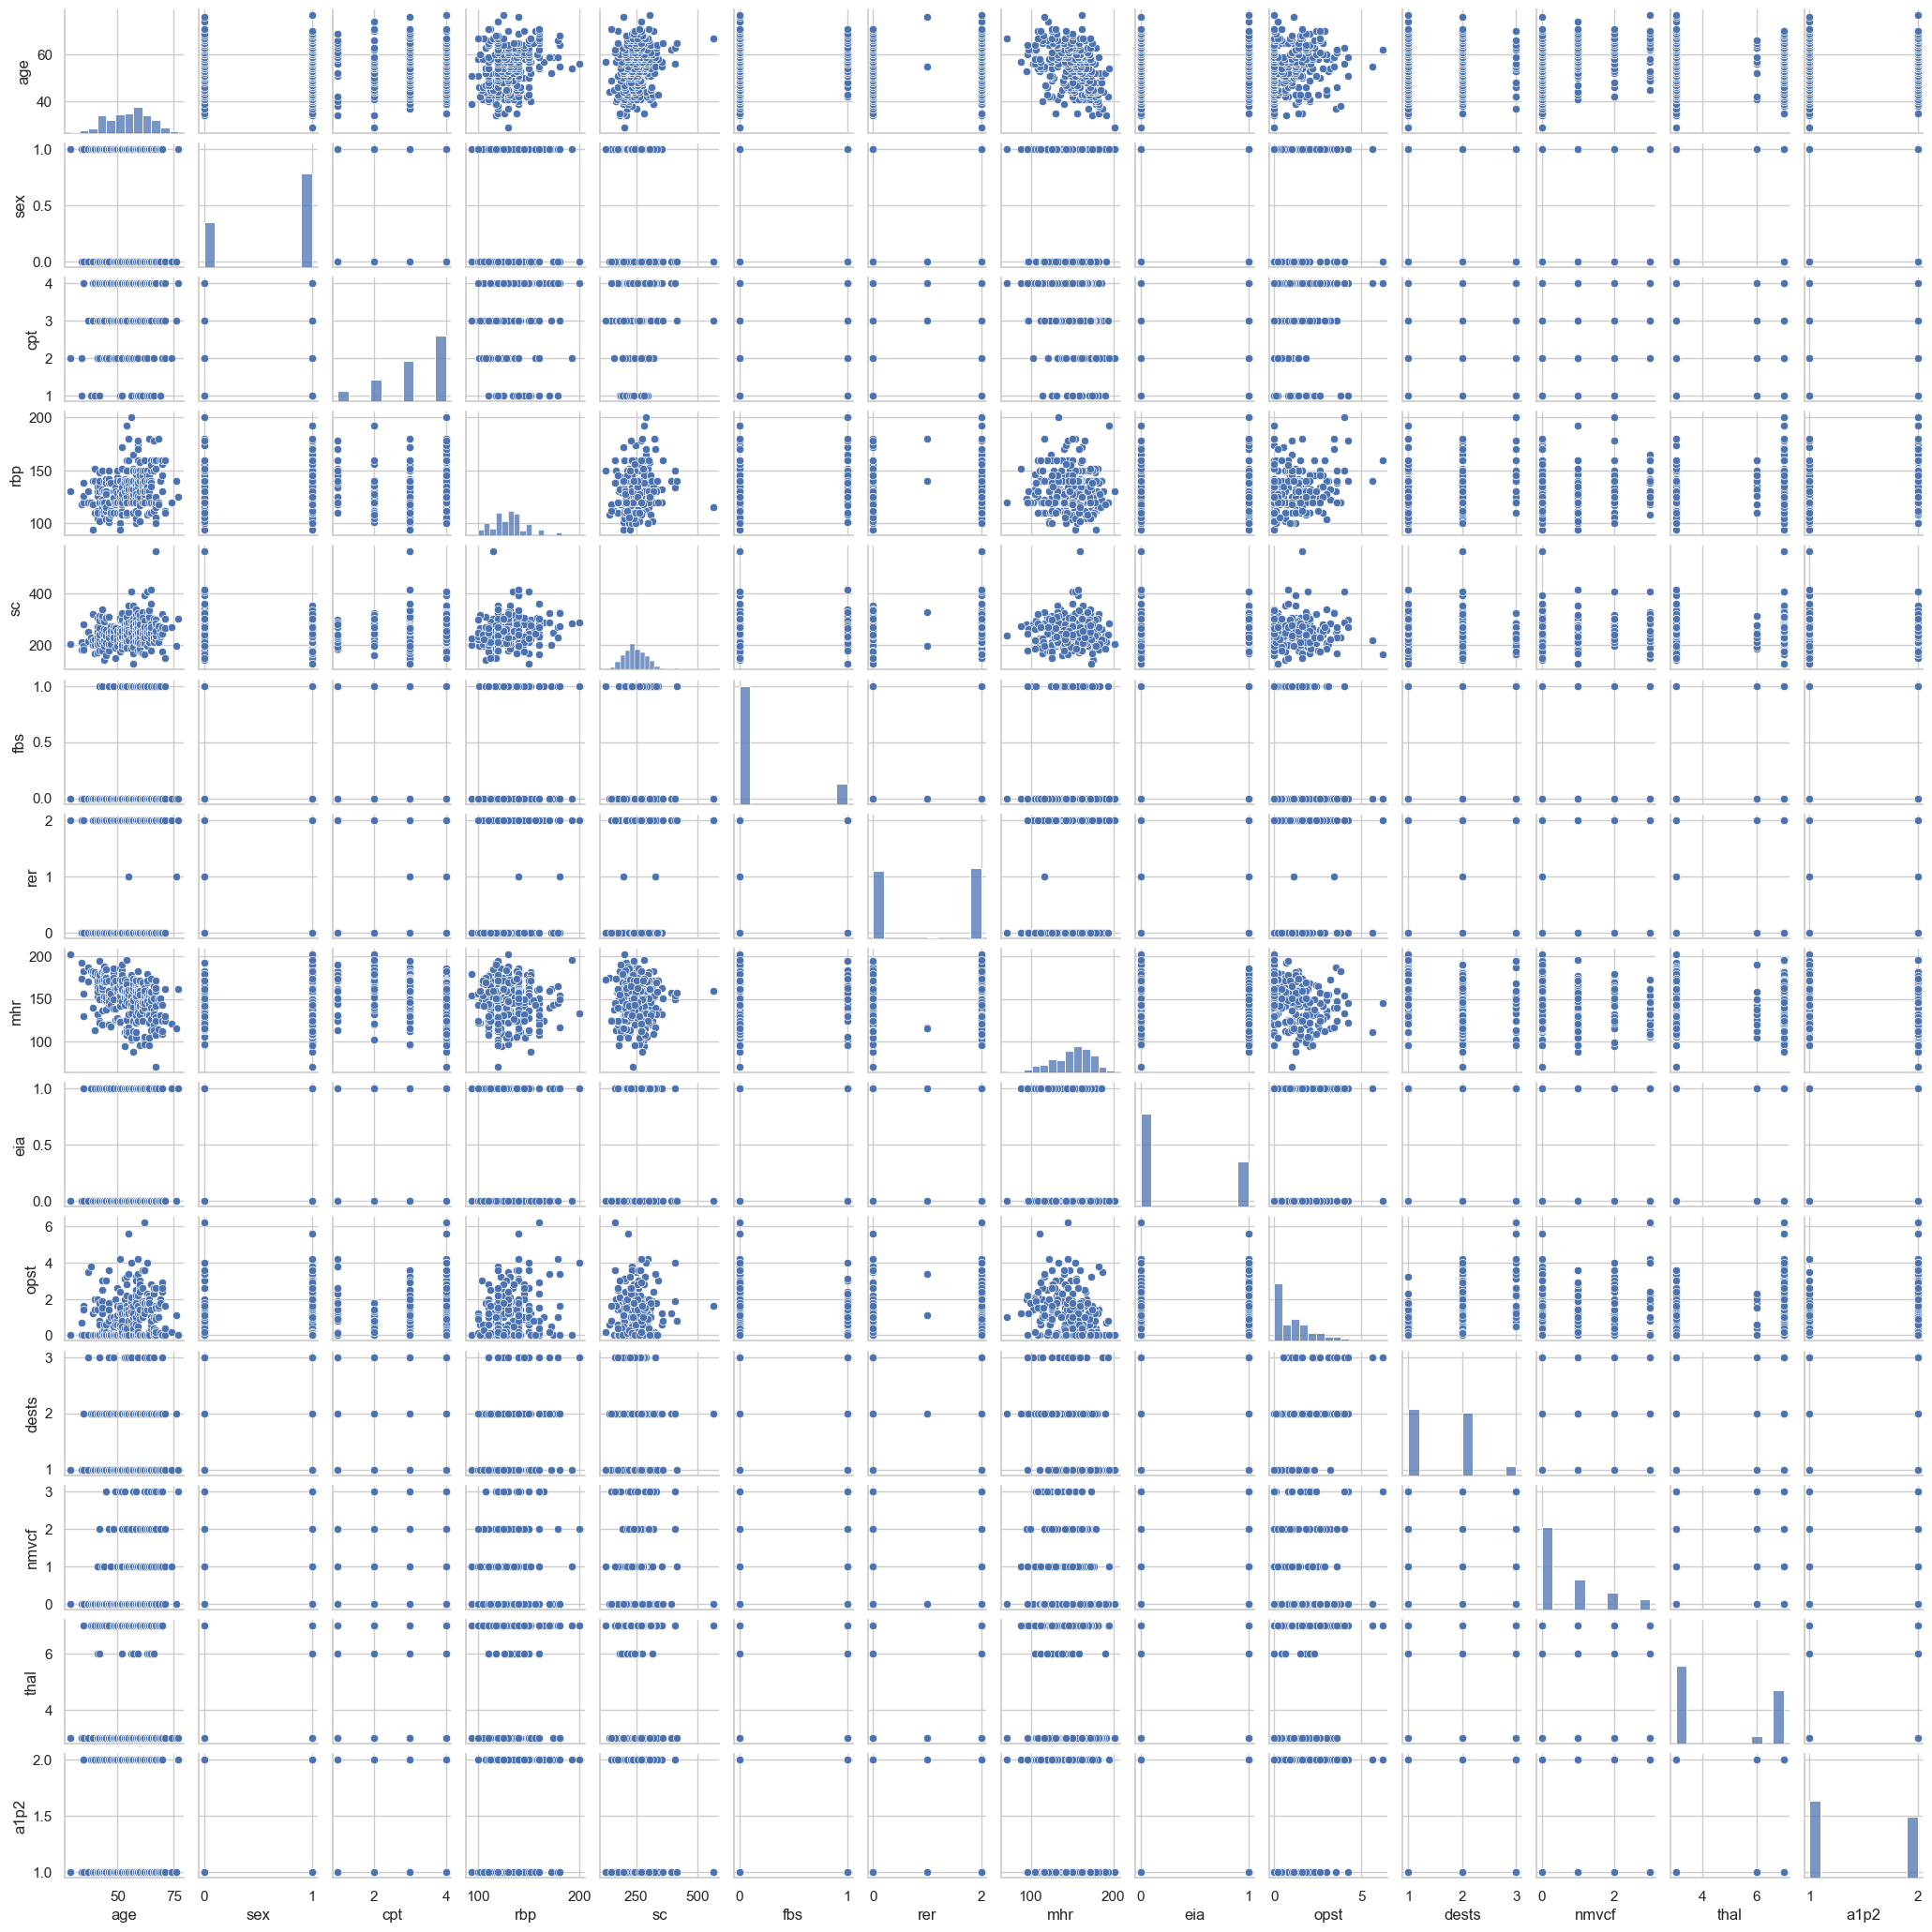

In [13]:
sns.set(style='whitegrid', context='notebook') # set the appearance
sns.pairplot(heart_df,height=1.5) # create the pair plots
plt.show() # and show them

## PART-2 APPLY ML ALGORITHMS

In [14]:
import numpy as np
import pandas as pd

from collections import defaultdict
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the dataset
heart_df = pd.read_csv('./heart1.csv')
heart_df.head()

In [15]:
# Split the data X and Y. Y being the target variable.
# X being a collection of dependent and independent variables which needs to be analyzed
X = heart_df.values[:, 0:13]
Y = heart_df.values[:, 13]
validation_size = 0.2
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=42)
X_train.shape

(216, 13)

In [37]:
# Apply a standard scaler algorithm to scale all 
# features in a fixed range
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1. PERCEPTRON

In [17]:
tol_accuracy_map = {1: 0, 1e-1: 0, 1e-2: 0, 1e-3: 0, 1e-4: 0}

In [18]:
for key in tol_accuracy_map.keys():
    clf = Perceptron(tol=key, random_state=0)
    clf.fit(X_train, Y_train)
    tol_accuracy_map[key] = clf.score(X_test, Y_test)

In [19]:
tol_accuracy_map

{1: 0.9074074074074074,
 0.1: 0.7592592592592593,
 0.01: 0.8703703703703703,
 0.001: 0.8703703703703703,
 0.0001: 0.8703703703703703}

### 2. LOGISTIC REGRESSION

In [20]:
solver_accuracy_map = {'lbfgs': 0, 'liblinear': 0, 'newton-cg': 0, 'sag': 0, 'saga': 0}

In [21]:
for solver in solver_accuracy_map.keys():
    clf = LogisticRegression(solver=solver,
            random_state=0)
    clf.fit(X_train, Y_train)
    solver_accuracy_map[solver] = clf.score(X_test, Y_test)

In [22]:
solver_accuracy_map

{'lbfgs': 0.9074074074074074,
 'liblinear': 0.9074074074074074,
 'newton-cg': 0.9074074074074074,
 'sag': 0.9074074074074074,
 'saga': 0.9074074074074074}

### 3. SUPPORT VECTOR MACHINE

In [23]:
kernel_accuracy_map = {'linear': 0, 'sigmoid': 0, 'rbf': 0}

In [24]:
for key in kernel_accuracy_map.keys():
    clf = SVC(kernel=key)
    clf.fit(X_train, Y_train)
    kernel_accuracy_map[key] = clf.score(X_test, Y_test)

In [25]:
kernel_accuracy_map

{'linear': 0.9259259259259259,
 'sigmoid': 0.9259259259259259,
 'rbf': 0.9444444444444444}

### 4. DECISION TREE LEARNING

In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [27]:
clf.score(X_test, Y_test)

0.7592592592592593

### 5. RANDOM FOREST CLASSIFIER

In [28]:
clf = RandomForestClassifier(max_depth=4, random_state=4)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, random_state=4)

In [29]:
clf.score(X_test, Y_test)

0.9259259259259259

### 6. K-NEAREST NEIGHBOR

In [30]:
knn_accuracies = defaultdict(int)
for k in range(1, 100):
    clf = KNeighborsClassifier(algorithm='auto', n_neighbors=k)
    clf.fit(X_train, Y_train)
    knn_accuracies[k] = clf.score(X_test, Y_test)
    
max_accuracies = max(knn_accuracies, key=lambda x: knn_accuracies[x])
kmax = f"No. of neighbors={max_accuracies} with accuracy of {knn_accuracies[max_accuracies]}"
print(kmax)

No. of neighbors=13 with accuracy of 0.9259259259259259


In [31]:
min_accuracies = min(knn_accuracies, key=lambda x: knn_accuracies[x])
kmin = f"No. of neighbors={min_accuracies} with accuracy of {knn_accuracies[min_accuracies]}"
print(kmin)

No. of neighbors=1 with accuracy of 0.8148148148148148
